In [9]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
data = pd.read_csv("./Data/featuresfloatvf.csv")

# 'fake_follower',,'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','12:00 AM','1:00 AM','2:00 AM','3:00 AM','4:00 AM','5:00 AM','6:00 AM','7:00 AM','8:00 AM','9:00 AM','10:00 AM','11:00 AM','12:00 PM','1:00 PM','2:00 PM','3:00 PM','4:00 PM','5:00 PM','6:00 PM','7:00 PM','8:00 PM','9:00 PM','10:00 PM','11:00 PM'
# ,'avg_tweets_by_hour_of_day','avg_tweets_by_day_of_week'
x = data.iloc[:, :-2]

y = data.account_type.values.tolist()
x

,verified,statuses,location,date_joined,most_recent_post,following,followers,favourites,lists,tweet_language,tweets_this_week,retweet,retweeted_count,URL works,userNameScore,avg_tweets_by_hour_of_day,avg_tweets_by_day_of_week
0,0,270,1,2010,2022,131.0,55.0,1484,2,1,0.0,32.0,103418.0,0,0.642857,2.000,6.857
1,0,14302,0,2012,2023,440.0,557.0,2958,2,1,0.0,154.0,867392.0,0,0.000000,8.083,27.714
2,0,4585,1,2009,2023,288.0,111.0,7983,3,1,0.0,108.0,2996382.0,0,0.909091,8.167,28.000
3,1,15851,1,2010,2022,39.0,71644.0,20105,172,2,0.0,20.0,66477.0,1,0.600000,8.333,28.571
4,0,115,0,2016,2017,0.0,0.0,47,0,1,0.0,66.0,236220.0,0,0.785714,4.167,14.286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21996,0,67367,1,2016,2023,1.0,1253.0,1,33,1,183.0,0.0,6.0,0,1.000000,8.333,28.571
21997,0,1227,0,2016,2017,0.0,13.0,1226,0,1,0.0,22.0,8391.0,0,0.166667,0.958,3.286
21998,0,18,0,2012,2018,0.0,10.0,108,0,1,0.0,10.0,335.0,0,0.153846,0.583,2.000
21999,0,2857,1,2011,2023,173.0,114.0,1941,2,1,0.0,130.0,489533.0,0,0.785714,6.375,21.857


SelectKBest

In [8]:
bestfeatures = SelectKBest(score_func=f_classif,k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features


# result :avg_tweets_by_day_of_week,avg_tweets_by_hour_of_day,verified ,location,date_joined, likes

                           Specs        Score
16  avg_ssgtweets_by_day_of_week  4706.430184
15     avg_tweets_by_hour_of_day  4706.384585
0                       verified  3888.302600
13                     URL works  2401.604765
2                       location  1744.201520
3                    date_joined  1433.929373
7                          likes   972.669256
11                       retweet   911.753823
14                 userNameScore   681.271004
6                      followers   253.901910


Tree-based Feature Selection

[0.01910852 0.07164747 0.00787493 0.04502153 0.06924098 0.08704911
 0.13944816 0.10540762 0.04610416 0.02582345 0.01968331 0.0733712
 0.07814108 0.00662062 0.03864905 0.08028964 0.08651918]


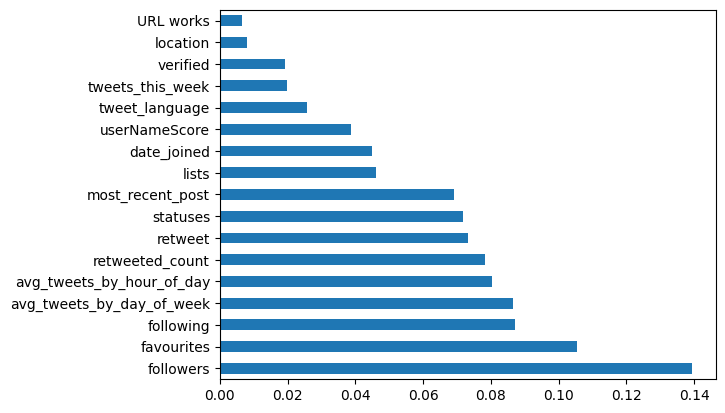

In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = RandomForestClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

c

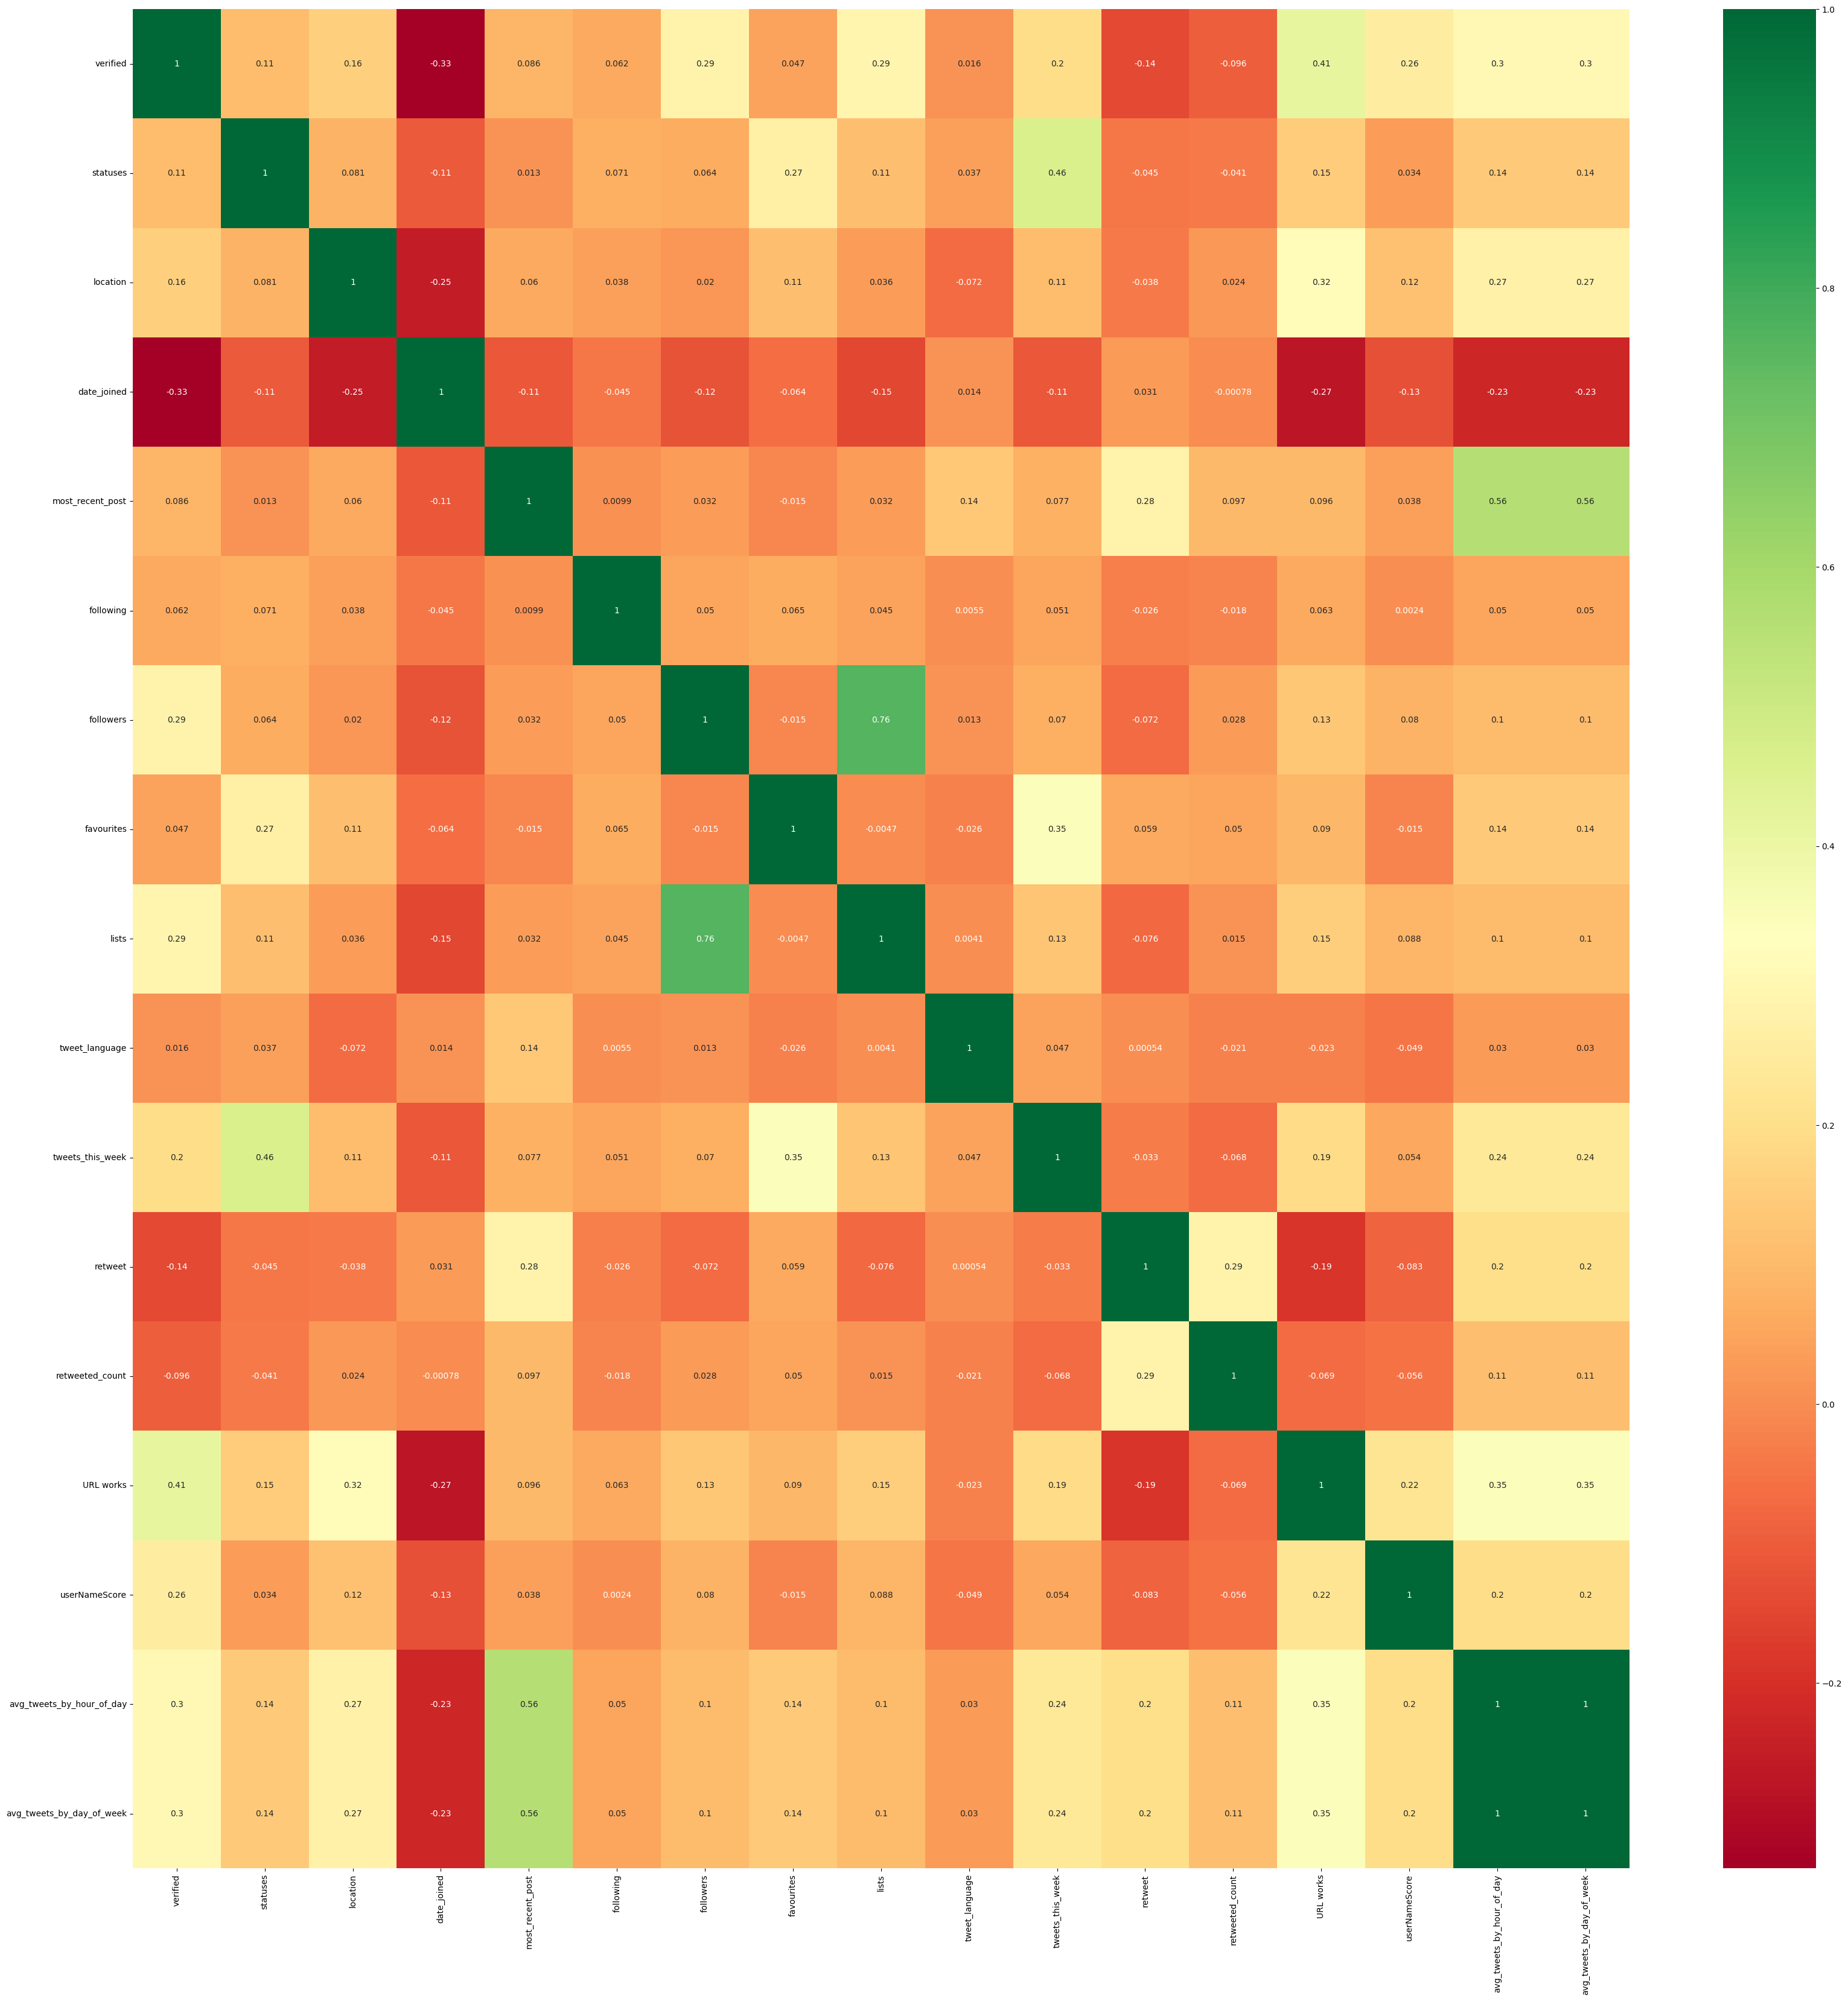

In [10]:
import pandas as pd
import numpy as npmutual_info_classif
import seaborn as sns

#get correlations of each features in dataset
corrmat = x.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(40,40))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")


Correlation-based Feature Selection (CFS)

In [6]:
bestfeatures = SelectKBest(score_func=mutual_info_classif,k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features




                        Specs     Score
6                   followers  0.177689
15  avg_tweets_by_hour_of_day  0.172018
16  avg_tweets_by_day_of_week  0.167986
4            most_recent_post  0.157055
5                   following  0.129559
7                  favourites  0.126436
1                    statuses  0.109672
8                       lists  0.107659
10           tweets_this_week  0.083581
0                    verified  0.078729


Recursive Feature Elimination (RFE)

In [9]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_sequential_feature_selection

clf=RandomForestClassifier()
estimator = LogisticRegression(solver='liblinear')
selector = RFE(clf, n_features_to_select=10)
selected_features = selector.fit(x, y)

x.loc[:, selected_features.support_]

,statuses,date_joined,most_recent_post,following,followers,likes,retweet,retweeted_count,avg_tweets_by_hour_of_day,avg_tweets_by_day_of_week
0,7098,2009,0,166.0,125.0,12213,0.0,0.0,0.000,0.000
1,270,2010,2022,131.0,55.0,1484,32.0,103418.0,2.000,6.857
2,14302,2012,2023,440.0,557.0,2958,154.0,867392.0,8.083,27.714
3,4585,2009,2023,288.0,111.0,7983,108.0,2996382.0,8.167,28.000
4,15851,2010,2022,39.0,71644.0,20105,20.0,66477.0,8.333,28.571
...,...,...,...,...,...,...,...,...,...,...
34039,60100,2010,2023,181.0,417832.0,61532,94.0,1375535.0,8.333,28.571
34040,40277,2010,2023,129.0,80306.0,1,0.0,15350.0,8.333,28.571
34041,6679,2009,2022,231.0,248542.0,28,16.0,18899.0,8.333,28.571
34042,2580,2013,2023,49.0,3383768.0,871,8.0,145792.0,8.333,28.571


Principal Component Analysis (PCA)

In [10]:
from sklearn.decomposition import PCA

# Reduce the dimensionality using PCA
pca = PCA(n_components=10)
X_new = pca.fit_transform(x)

print(pd.DataFrame(pca.components_.T, index=x.columns))
# Print the selected features

# print(pd.DataFrame(pca.components_,columns=x.columns))

[[-4.12740572e+05 -3.11709713e+05 -1.74549944e+04 ... -6.54390916e-01
  -3.76392495e+00 -7.15683197e-01]
 [-4.11849453e+05 -2.08290806e+05 -2.62081442e+04 ...  3.59503930e+01
   7.63448055e+00  1.51407112e+01]
 [-4.04199231e+05  5.55595199e+05 -9.98675800e+03 ... -7.45846203e+01
   6.54841837e+00 -4.80232503e+00]
 ...
 [-1.64153552e+05 -2.95147247e+05 -2.08436672e+04 ...  4.99064634e+01
   8.31976071e+00 -5.70573365e+00]
 [ 2.97210686e+06 -1.97492046e+05 -2.80698630e+04 ...  5.47777655e+01
   7.52285304e+00 -5.40996449e+00]
 [-3.89228989e+05 -3.10185113e+05 -2.20710105e+04 ... -3.79947306e+01
  -7.00828657e+00 -2.91033927e+00]]


     *** Correlation-based Feature Selection (CFS)
           
followers most_recent_post  following likes statuses lists verified tweets_this_week  retweet_ratio retweeted_count 

***
 verified  location  date_joined  likes   retweet_ratio  userNameScore followers  tweets_this_week   tweet_language  retweeted_count 


***Recursive Feature Elimination (RFE)

verified	location	date_joined	most_recent_post	lists	tweet_language	tweets_this_week	retweet_ratio	URL works	userNameScore


***Tree-based Feature Selection

most_recent_post   retweet_ratio  likes date_joined statuses  verified  retweeted_count followers following userNameScore


'verified','statuses','location','date_joined','most_recent_post','following','followers','likes','lists','tweet_language','tweets_this_week','retweet_ratio','retweeted_count','URL works','userNameScore'

verified 4
retweet_ratio 4
retweeted_count 3
most_recent_post 3
date_joined 3
likes 3
userNameScore 3
followers 3
tweets_this_week 3
location 2
tweet_language 2
following 2
statuses 2
lists 2
URL works 1


